<a href="https://colab.research.google.com/github/H31inZuM/DATOS-DE-IA/blob/main/Practica1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [356]:
#importe de archivo desde internet
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/H31inZuM/DATOS-DE-IA/main/oecd_bli_2018.csv", "oecd_bli_2018.csv")

('oecd_bli_2018.csv', <http.client.HTTPMessage at 0x7f2e58cbf5d0>)

In [357]:
#importando librerias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

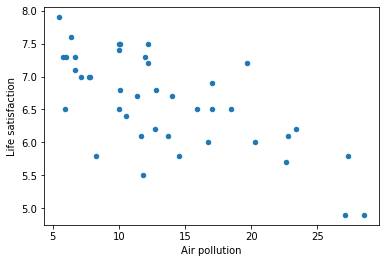

In [358]:
# Cargando la data data
oecd_bli = pd.read_csv("oecd_bli_2018.csv", thousands=',')

#funcion para preparar formato de archivo
def formato_datos(oecd_bli):
    ''' Acomoda los datos para preparar el conjunto de entrenamiento  '''
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    oecd_bli.sort_values(by="Air pollution", inplace=True)
    return oecd_bli[["Air pollution", "Life satisfaction"]]

country_stats = formato_datos(oecd_bli)
def graficar (country_stats):
  # Preparando los datos
  X = np.c_[country_stats["Air pollution"]]
  y = np.c_[country_stats["Life satisfaction"]]
  # Visualizando la data
  country_stats.plot(kind='scatter', x="Air pollution", y='Life satisfaction')
  plt.show()
graficar(country_stats)


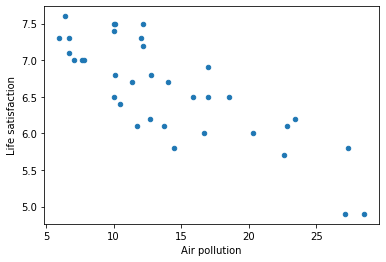

In [359]:
#optimizando
def forma_optimizado(oecd_bli):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    oecd_bli.sort_values(by="Air pollution", inplace=True)
    remove_indices = [0,1,2, 10, 19, 33]
    keep_indices = list(set(range(41)) - set(remove_indices))
    return oecd_bli[["Air pollution", "Life satisfaction"]].iloc[keep_indices]

country_stats = forma_optimizado(oecd_bli)
graficar(country_stats)


In [360]:
X = np.c_[country_stats["Air pollution"]]
y = np.c_[country_stats["Life satisfaction"]]

# Seleccionar un modelo lineal
model = sklearn.linear_model.LinearRegression()
# Entrenando el modelo
model.fit(X, y)

#Datos para medida de precicion
#Prediccion para finlandia (datos de tabla, pollution:5.5 y Ls: 7.9)
X_new = [[5.5]]  # Pollution 
print(model.predict(X_new)) # salida esperado de indice de LS (7.9)

#Prediccion para Suecia (datos de tabla, pollution:5.8 y Ls: 7.3)
X_new = [[5.8]]  # Pollution 
print(model.predict(X_new)) # salida esperado de indice de LS (7.3)


[[7.36531411]]
[[7.33840883]]


Usando algoritmo de k-nearest neigbors

In [361]:
# Select a 3-Nearest Neighbors regression model
import sklearn.neighbors
model1 = sklearn.neighbors.KNeighborsRegressor(n_neighbors=4)
# Entrenando el modelo
model1.fit(X,y)
#Datos para medida de precicion
#Prediccion para finlandia (datos de tabla, pollution:5.5 y Ls: 7.9)
X_new = [[5.5]]  # Pollution 
print(model1.predict(X_new)) # salida esperado de indice de LS (7.9)

#Prediccion para Suecia (datos de tabla, pollution:5.8 y Ls: 7.3)
X_new = [[5.8]]  # Pollution 
print(model1.predict(X_new)) # salida esperado de indice de LS (7.3)

[[7.325]]
[[7.325]]


***Se concluye de que, para que el modelo sea representativo y pueda servir para predicir se requiere eliminar los datos sesgados, con estas condiciones si logra tener una precision aceptable, tambien se observo de que tiene una mejor precision con el algoritmo de regresion lineal.***